In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() 

In [9]:
if os.path.isfile("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States copy.csv"):
    filepath = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States copy.csv"
    print("loading from file")
else:
    filepath = "https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD"
    print("loading from the internet")

suiciderate_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [10]:
suiciderate_data.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [11]:
suiciderate_data.columns

Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')

In [12]:
row_one = suiciderate_data.iloc[1]
row_one

INDICATOR                                   Death rates for suicide
UNIT              Deaths per 100,000 resident population, age-ad...
UNIT_NUM                                                          1
STUB_NAME                                                     Total
STUB_NAME_NUM                                                     0
STUB_LABEL                                              All persons
STUB_LABEL_NUM                                                  0.0
YEAR                                                           1960
YEAR_NUM                                                          2
AGE                                                        All ages
AGE_NUM                                                         0.0
ESTIMATE                                                       12.5
FLAG                                                            NaN
Name: 1, dtype: object

<Axes: xlabel='YEAR'>

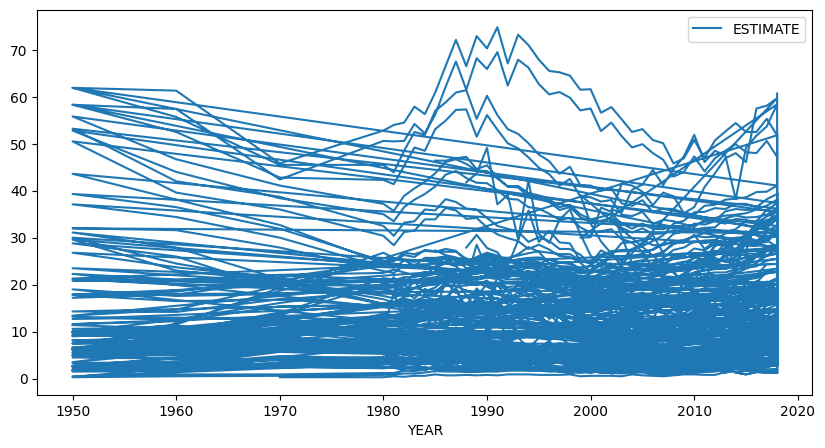

In [18]:
suiciderate_data.plot(x='YEAR',  y='ESTIMATE')

In [25]:
example  =  suiciderate_data[suiciderate_data["STUB_LABEL"]  ==  "All  persons"]
example

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG


In [27]:
stublabel_list = []
for stublabel_list in "STUB_LABEL":
    if "STUB_LABEL" == "All persons":
        stublabel_list.append("STUB_LABEL")
print(stublabel_list)


L
